In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from collections import deque
from functools import lru_cache
from PIL import Image

# Projeto 1 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Arthur Henrique Silva Carvalho
## Matrícula: 211026673

# Questão 1

## Questão 1a (0.5 pontos)

O objetivo deste exercício é estudar a decimação e a interpolação de sinais. 
Escreva uma função em python que receba um sinal x[n] e retorne um sinal y[n] que seja a decimação por um fator de 2 do sinal de entrada x[n]. 

Em seguida, use a sua função para encontrar o sinal decimado para a entrada: 

$$ x = \left[1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0 \right]$$

In [6]:
def decimate_by_2(signal: np.ndarray) -> np.ndarray:
    length = len(signal)
    decimated = np.zeros(length // 2 + int(length % 2 != 0))
    idx = 0
    for i in range(0, len(signal), 2):
        decimated[idx] = signal[i]
        idx += 1
    return decimated


s = np.array([1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0])
print('Sinal =', s)
s = decimate_by_2(signal=s)
print('1-a) Decimado =', *s, sep=', ')

Sinal = [1 2 1 0 1 2 1 0 1 2 1 0 1 2 1 0 1 2 1 0]
1-a) Decimado =, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0


## Questão 1b (0.5 pontos)

Escreva uma função em python que receba um sinal y[n] e retorne um sinal z[n] que seja a interpolação por um fator de 2 do sinal de entrada y[n]. A sua função deve aumentar o número de amostras e assinalar um novo valor para as amostras criadas. Você pode escolher se as amostras interpoladas terão o valor médio das amostras ou o valor da amostra anterior. 

Em seguida, utilize a sua função para encontrar o sinal interpolado para o sinal y[n] da questão anterior (1a).


In [7]:
def interpolate_by_2(signal: np.ndarray) -> np.ndarray:
    length = len(signal)
    interpolated = np.zeros(length * 2)
    idx = 0
    for i in range(length * 2 - 1):
        if i % 2 == 0:
            interpolated[i] = float(signal[idx])
            idx += 1
        else:
            interpolated[i] = (signal[idx] + signal[idx - 1]) / 2
    interpolated[-1] = signal[-1] / 2
    return interpolated


s = interpolate_by_2(signal=s)
print('1-b) Interpolado =', *s, sep=', ')
print('')

1-b) Interpolado =, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5



## Questão 1c (1 ponto)

Uma imagem é um sinal discreto de duas dimensões. 
Escrevemos I(x,y) para representar esta imagem como uma matriz bidimensional de dimensões (w x h), onde w é a largura da imagem e h a sua altura.

Para imagens, fazemos a decimação e a interpolação separadamente, para todas as linhas e, em seguida, para todas as colunas (ou vice-versa), considerando que cada linha ou coluna é um sinal de uma dimensão.

Aplique o seu algoritmo de decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante.

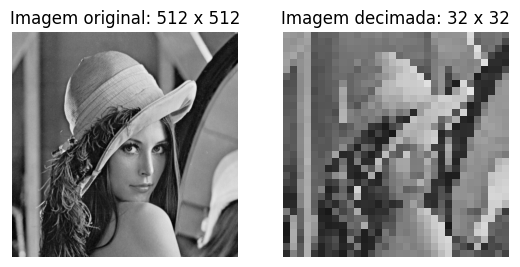

In [41]:
def iterate_decimation(arr: np.ndarray) -> np.ndarray:
    h, w = arr.shape
    for _ in range(4):
        new_arr = np.zeros((h, w // 2))
        for i in range(len(arr)):
            new_arr[i] = decimate_by_2(arr[i])
        arr = new_arr
        h, w = arr.shape
    return arr


im = Image.open('lena.bmp')
arr = np.array(im)
h, w = arr.shape
ax = plt.subplots(1,2)[1]
ax[0].imshow(im, cmap='gray')
ax[0].axis('off')
ax[0].set_title(f'Imagem original: {h} x {w}')
arr = iterate_decimation(arr=arr.T)
arr = iterate_decimation(arr=arr.T)
h, w = arr.shape
im = Image.fromarray(arr)
ax[1].imshow(im, cmap='gray')
ax[1].axis('off')
ax[1].set_title(f'Imagem decimada: {h} x {w}')
plt.show()


## Questão 1d (1 ponto)

Utilizando como entrada a imagem decimada (de tamanho w/16 x h/16) da questão anterior (1c), aplique o seu algoritmo de interpolação sucessivamente até obter uma imagem com tamanho (w x h), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante. Compare a imagem original com a imagem que foi decimada/interpolada. 

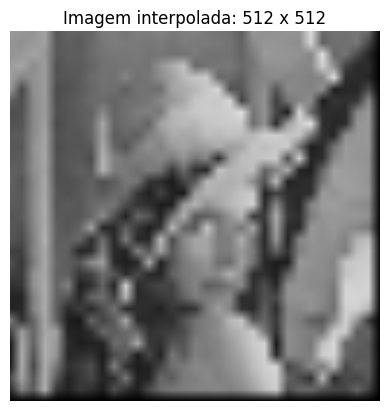

In [42]:
def iterate_interpolation(arr: np.ndarray) -> np.ndarray:
    h, w = arr.shape
    for _ in range(4):
        new_arr = np.zeros((h, w * 2))
        for i in range(len(arr)):
            new_arr[i] = interpolate_by_2(arr[i])
        arr = new_arr
        h, w = arr.shape
    return arr


arr = iterate_interpolation(arr=arr.T)
arr = iterate_interpolation(arr=arr.T)
h, w = arr.shape
im = Image.fromarray(arr)
ax = plt.subplots(1,1)[1]
ax.imshow(im)
ax.set_title(f'Imagem interpolada: {h} x {w}')
ax.axis('off')
plt.show()

# Questão 2

Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] + \frac{1}{6}y\left[n\right] = x\left[n+2\right] + 2x\left[n+1\right]+x\left[n\right] $$
$$ x\left[n\right] = \left(\frac{1}{4}\right)^n u\left[n\right] $$
$$ y\left[-1\right] = y\left[-2\right] = 0 $$

## Questão 2a (1 ponto)

Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [6]:
### Código da questão 2a.

## Questão 2b (1 ponto)
Escreva um código para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida iterativamente com a resposta analítica para as primeiras 100 amostras, plotando o gráfico das duas respostas.

Calcule também o erro médio quadrático entre os dois sinais, h[n] analítico e g[n] iterativo, através da equação:

$$ MSE = \frac{1}{N} \sum_{i=0}^{N-1} \left( h\left[i\right] - g\left[i\right] \right)^2 $$

onde N é o número de amostras considerado (no caso, 100 amostras).

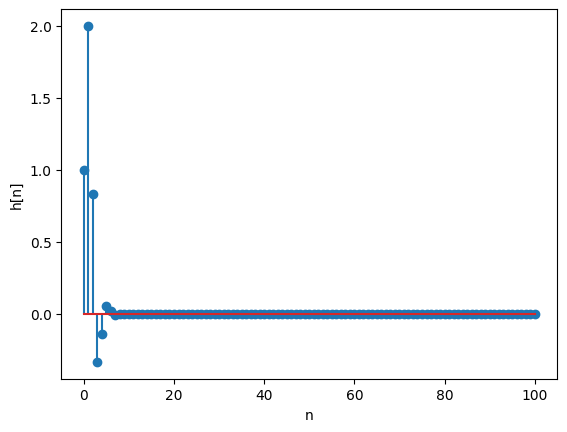

In [4]:
def delta(n: int) -> int:
    return int(n == 0)


@lru_cache(maxsize=102)
def h(n: int) -> int:
    if  n < 0:
        return 0
    return (-1/6)*h(n-2) + delta(n) + 2*delta(n-1) + delta(n-2) 


n = [i for i in range(101)]
h_n = [h(i) for i in n]
plt.stem(n, h_n)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()

## Questão 2c (1 ponto)

Determine a resposta do sistema às condições iniciais dadas analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [8]:
### Código da questão 2c.

### Questão 2d (1 ponto)
Escreva um programa para obter a resposta do sistema através da convolução da entrada com a resposta ao impulso h[n] truncada para as primeiras 20 amostras (isto é, considerando apenas as primeiras 20 amostras de h[n]).

Compare a resposta obtida pela convolução com a resposta obtida analiticamente, plotando o gráfico das duas respostas (calcule as primeiras 100 amostras do sinal). Calcule também o erro médio quadrático entre os dois sinais.

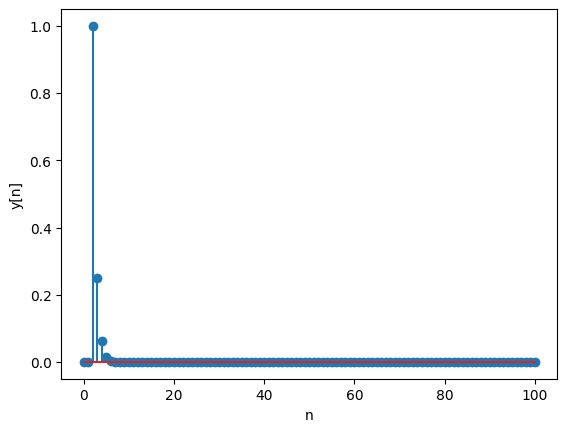

In [5]:
def x(n: int) -> int:
    return (1/4)**n * int(n >= 0)


def convolute(x: list, h: list) -> list:
    y = [0 for _ in range(len(x))]
    h_deque = deque(h)
    while len(h_deque) < len(y):
        h_deque.append(0)
    h_deque.rotate(-2)
    for i in range(len(y)):
        y[i] += sum([h_deque[j] * x[j] for j in range(i, -1, -1)])
        h_deque.rotate(1)
    return y


x_n = [x(i) for i in n]
y_n = convolute(x_n, h_n[::20])
plt.stem(n, y_n)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()

## Questão 2e (1 ponto)

Usando como entrada o sinal disponibilizado ('data_projeto1.mat'), determine a resposta do sistema. Plote o gráfico da entrada e da saída do sistema. 

In [10]:
### Códgio da Questão 2e
sinal = sp.io.loadmat('data_projeto1.mat')['sinal'].ravel()

# Questão 3
Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] -2~\cos \left( \frac{\pi}{8} \right) y\left[n+1\right] + y\left[n\right] = x\left[n\right] $$

## Questão 3a (1 ponto)
Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [11]:
### Código da questão 3a

## Questão 3b (1 ponto)
Escreva um programa para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida com a resposta analítica, plotando o gráfico das duas respostas para as primeiras 100 amostras. Calcule também o erro médio quadrático entre os dois sinais.

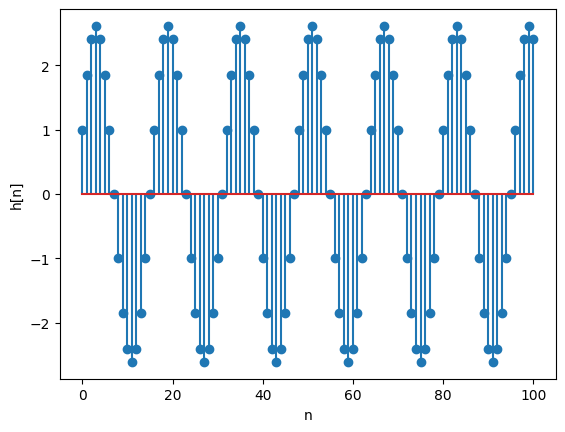

In [3]:
COS_CONSTANT = np.cos([np.pi/8])


def delta(n: int) -> int:
    return int(n == 0)


@lru_cache(maxsize=102)
def h(n: int) -> int:
    if n < 0:
        return 0
    return 2 * COS_CONSTANT * h(n-1) - h(n-2) + delta(n)


n = [i for i in range(101)]
h_n = [h(i) for i in n]
plt.stem(n, h_n)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()